In [4]:
%matplotlib inline

import sys,os
import time
import argparse

import numpy as np
from scipy import stats

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

from Data import *

import pandas as pd
import sklearn.metrics

In [9]:
progName = "Gen Paper Figures"

verbose = True
inputFn1 = "data/output/population/2008_population_data.csv"
inputFn2 = "data/output/groundTruthOutput/2008_groundTruth_data.csv"
year = 2008

print "Starting %s" % (progName)
startTime = float(time.time())


print "Loading input files"
data1 = loadPopulationFile(inputFn1)
data2 = np.loadtxt(inputFn2, dtype=int, delimiter=",", skiprows=1)
for i in range(data2.shape[0]):
    data2[i,i] = 0

xVals = []
scatterYVals1 = []
pts1 = []
for i in xrange(len(data1)):
    xVals.append(data1[i])
    yVal = np.sum(data2[i,:])

    pts1.append((data1[i],yVal))
    scatterYVals1.append(yVal)

pts1 = sorted(pts1,key=lambda x:x[0])

xVals = np.array(xVals)
yVals = np.array(scatterYVals1)

xVals = xVals[yVals!=0]
yVals = yVals[yVals!=0]

Starting Gen Paper Figures
Loading input files


Slope from linear fit: 0.0309


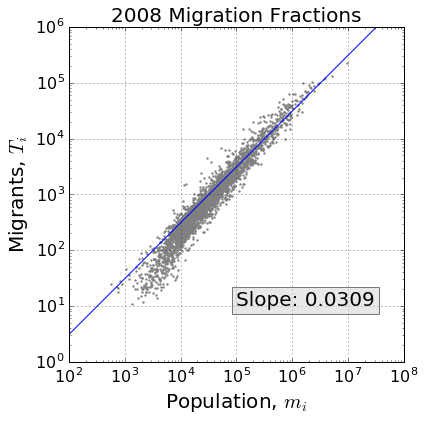

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))


ax.set_ylabel('Migrants, $T_i$', size=20)
ax.set_xlabel('Population, $m_i$', size=20)
ax.set_title('%d Migration Fractions' % (year), size=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([1e2, 1e8, 1e0, 1e6])



slope, intercept, r_value, p_value, std_err = stats.linregress(xVals,yVals)
xs = np.linspace(1e2,1e8,num=100000)
ys = xs*slope
ax.plot(xs,ys)
print "Slope from linear fit: %0.4f" % (slope)
slope = slope

ax.scatter(xVals,yVals,s=2,color='grey',alpha=0.9, zorder=0)

ax.text(
    1*10**5.0,
    1*10**1.0,
    "Slope: %0.4f" % slope,
    bbox=dict(facecolor='lightgrey', alpha=0.5),
    fontsize=20,
    color='black',
)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid()
plt.show()


Loading input files
Slope from linear fit: 0.0286


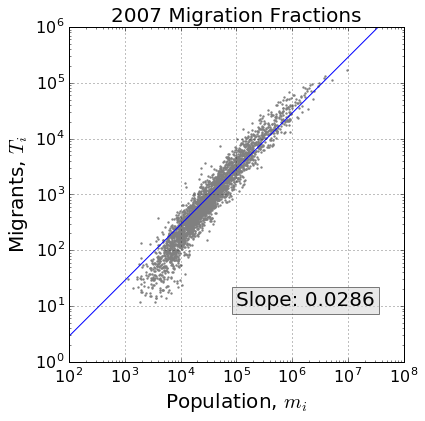

Loading input files
Slope from linear fit: 0.0309


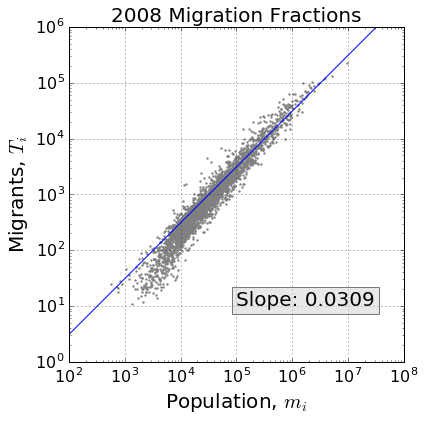

Loading input files
Slope from linear fit: 0.0300


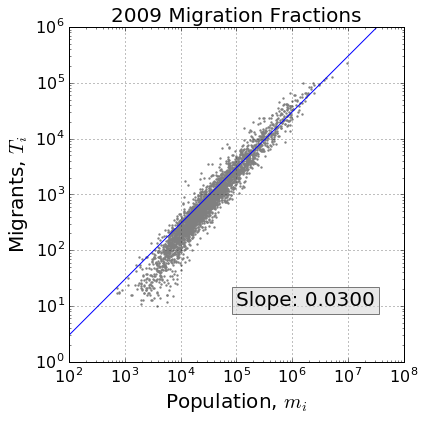

Loading input files
Slope from linear fit: 0.0297


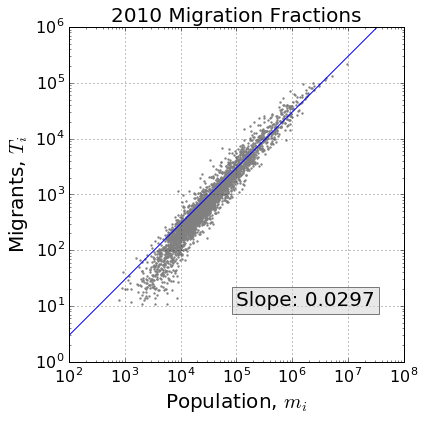

Loading input files
Slope from linear fit: 0.0344


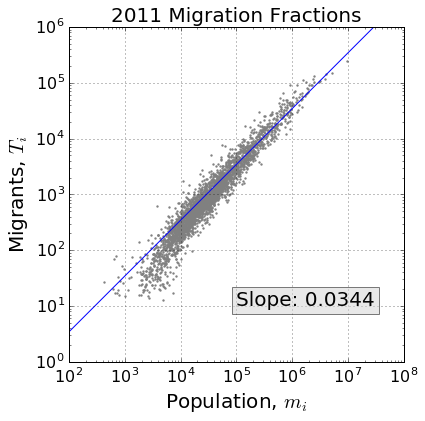

Loading input files
Slope from linear fit: 0.0356


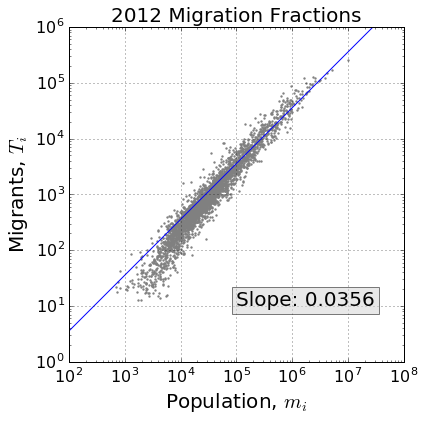

Loading input files
Slope from linear fit: 0.0314


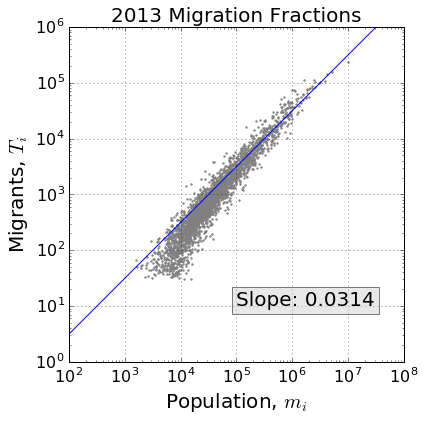

In [23]:
for year in range(2007,2014):
    
    inputFn1 = "data/output/population/%d_population_data.csv" % (year)
    inputFn2 = "data/output/groundTruthOutput/%d_groundTruth_data.csv" % (year)


    print "Loading input files"
    data1 = loadPopulationFile(inputFn1)
    data2 = np.loadtxt(inputFn2, dtype=int, delimiter=",", skiprows=1)
    for i in range(data2.shape[0]):
        data2[i,i] = 0

    xVals = []
    scatterYVals1 = []
    pts1 = []
    for i in xrange(len(data1)):
        xVals.append(data1[i])
        yVal = np.sum(data2[i,:])

        pts1.append((data1[i],yVal))
        scatterYVals1.append(yVal)

    pts1 = sorted(pts1,key=lambda x:x[0])

    xVals = np.array(xVals)
    yVals = np.array(scatterYVals1)

    xVals = xVals[yVals!=0]
    yVals = yVals[yVals!=0]
    
    fig, ax = plt.subplots(figsize=(6, 6))

    ax.set_ylabel('Migrants, $T_i$', size=20)
    ax.set_xlabel('Population, $m_i$', size=20)
    ax.set_title('%d Migration Fractions' % (year), size=20)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.axis([1e2, 1e8, 1e0, 1e6])



    slope, intercept, r_value, p_value, std_err = stats.linregress(xVals,yVals)
    xs = np.linspace(1e2,1e8,num=100000)
    ys = xs*slope
    ax.plot(xs,ys)
    print "Slope from linear fit: %0.4f" % (slope)
    slope = slope

    ax.scatter(xVals,yVals,s=2,color='grey',alpha=0.9, zorder=0)

    ax.text(
        1*10**5.0,
        1*10**1.0,
        "Slope: %0.4f" % slope,
        bbox=dict(facecolor='lightgrey', alpha=0.5),
        fontsize=20,
        color='black',
    )

    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.grid()
    plt.show()
